In [54]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')


In [55]:
#Loading data for analysis
df = pd.read_excel('sample_data.xlsx')

In [56]:
# Loading the first 10 rows for quick review of columns and rows.
df.head(10)

,Team Member,Claim Number,State,Customer Name,Gender,Survey Score,Reason for Score
0,Alice,CLM5655,PA,Customer44,Male,8,No Returned Calls
1,Alice,CLM9341,OH,Customer30,Female,9,Excellent service
2,Alice,CLM5501,NY,Customer21,Female,7,Very good service
3,Alice,CLM4674,IL,Customer28,Female,2,Claim Was Denied
4,Alice,CLM6748,TX,Customer99,Female,5,Average service
5,Alice,CLM2426,CA,Customer36,Female,8,No Returned Calls
6,Alice,CLM8757,FL,Customer96,Male,3,Bad service
7,Alice,CLM8219,NY,Customer22,Male,4,Poor service
8,Alice,CLM2821,TX,Customer91,Male,6,Good service
9,Alice,CLM8994,CA,Customer81,Male,8,No Returned Calls


In [57]:
# Reviewing data for possible null values and checking data type.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Team Member       250 non-null    object
 1   Claim Number      250 non-null    object
 2   State             250 non-null    object
 3   Customer Name     250 non-null    object
 4   Gender            250 non-null    object
 5   Survey Score      250 non-null    int64 
 6   Reason for Score  250 non-null    object
dtypes: int64(1), object(6)
memory usage: 13.8+ KB


In [58]:
# Statistical analysis to get an idea of the data. Only Survey Score is showing because it is the only numerical column
df.describe()

,Survey Score
count,250.000000
mean,5.752000
std,2.797463
min,1.000000
25%,3.000000
50%,6.000000
75%,8.000000
max,10.000000


In [59]:
# This will change the Score  to numbers for easier use in data analysis.
df['Survey Score'] = df['Survey Score'].apply(lambda x: 1 if x >= 8 else 0)


In [60]:
df

,Team Member,Claim Number,State,Customer Name,Gender,Survey Score,Reason for Score
0,Alice,CLM5655,PA,Customer44,Male,1,No Returned Calls
1,Alice,CLM9341,OH,Customer30,Female,1,Excellent service
2,Alice,CLM5501,NY,Customer21,Female,0,Very good service
3,Alice,CLM4674,IL,Customer28,Female,0,Claim Was Denied
4,Alice,CLM6748,TX,Customer99,Female,0,Average service
...,...,...,...,...,...,...,...
245,Eve,CLM9832,CA,Customer15,Male,0,Claim Was Denied
246,Eve,CLM8961,CT,Customer61,Male,0,Terrible service
247,Eve,CLM1072,IL,Customer78,Male,0,Very good service
248,Eve,CLM2046,TX,Customer27,Female,0,Very good service


In [61]:
# This tells us  that the number of surveys under a score of 8 double the good surveys. 
df['Survey Score'].value_counts()

Survey Score
0    170
1     80
Name: count, dtype: int64

c:\Users\Chila\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


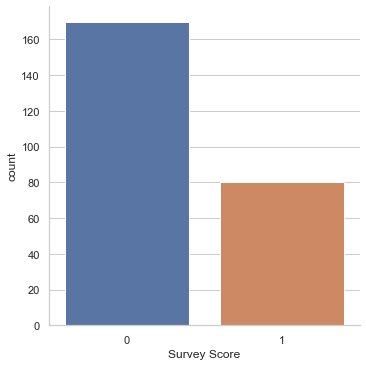

In [62]:
sns.catplot('Survey Score', data=df, kind='count')

c:\Users\Chila\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


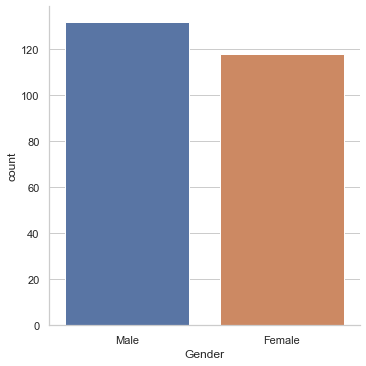

In [63]:
sns.catplot('Gender', data=df, kind='count')

c:\Users\Chila\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


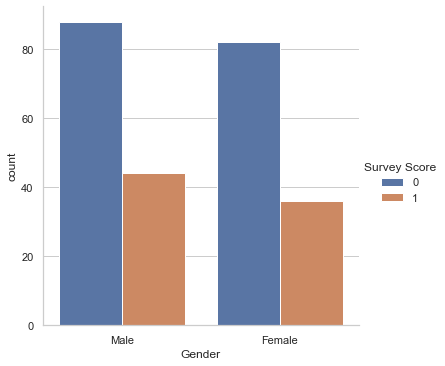

In [64]:
sns.catplot('Gender', data=df, kind='count',hue='Survey Score')

In [65]:
df.rename(columns={'Team Member': 'Team_Member', 'Claim Number': 'Claim_Number', 'Customer Name': 'Customer', 'Survey Score': 'Score', 'Reason for Score': 'Reason'}, inplace=True)

In [66]:
df

,Team_Member,Claim_Number,State,Customer,Gender,Score,Reason
0,Alice,CLM5655,PA,Customer44,Male,1,No Returned Calls
1,Alice,CLM9341,OH,Customer30,Female,1,Excellent service
2,Alice,CLM5501,NY,Customer21,Female,0,Very good service
3,Alice,CLM4674,IL,Customer28,Female,0,Claim Was Denied
4,Alice,CLM6748,TX,Customer99,Female,0,Average service
...,...,...,...,...,...,...,...
245,Eve,CLM9832,CA,Customer15,Male,0,Claim Was Denied
246,Eve,CLM8961,CT,Customer61,Male,0,Terrible service
247,Eve,CLM1072,IL,Customer78,Male,0,Very good service
248,Eve,CLM2046,TX,Customer27,Female,0,Very good service


In [67]:
df.groupby('Team_Member')['Score'].mean()

Team_Member
Alice      0.28
Bob        0.36
Charlie    0.32
David      0.32
Eve        0.32
Name: Score, dtype: float64

In [68]:
# Male = 1, Female = 0
df.groupby('Gender')['Score'].count()

Gender
Female    118
Male      132
Name: Score, dtype: int64

In [69]:
df.groupby('Team_Member')['Score'].count()

Team_Member
Alice      50
Bob        50
Charlie    50
David      50
Eve        50
Name: Score, dtype: int64

In [70]:
df_score = df[df['Score']< 8]

In [71]:
df_score

,Team_Member,Claim_Number,State,Customer,Gender,Score,Reason
0,Alice,CLM5655,PA,Customer44,Male,1,No Returned Calls
1,Alice,CLM9341,OH,Customer30,Female,1,Excellent service
2,Alice,CLM5501,NY,Customer21,Female,0,Very good service
3,Alice,CLM4674,IL,Customer28,Female,0,Claim Was Denied
4,Alice,CLM6748,TX,Customer99,Female,0,Average service
...,...,...,...,...,...,...,...
245,Eve,CLM9832,CA,Customer15,Male,0,Claim Was Denied
246,Eve,CLM8961,CT,Customer61,Male,0,Terrible service
247,Eve,CLM1072,IL,Customer78,Male,0,Very good service
248,Eve,CLM2046,TX,Customer27,Female,0,Very good service


In [72]:
df_score.groupby('Team_Member')['Score'].count()

Team_Member
Alice      50
Bob        50
Charlie    50
David      50
Eve        50
Name: Score, dtype: int64

In [73]:
df_score.groupby('Gender')['Score'].count()

Gender
Female    118
Male      132
Name: Score, dtype: int64

In [74]:
df.groupby('State')['Score'].count()

State
CA    47
CT    22
FL    15
GA    24
IL    23
NY    43
OH    23
PA    20
TX    33
Name: Score, dtype: int64

In [75]:
# Count of reasons for score given
df.groupby('Reason')['Score'].count()

Reason
Average service        20
Bad service            27
Claim Was Denied       21
Excellent service      34
Good service           22
No Returned Calls      27
Outstanding service    19
Poor service           21
Terrible service       21
Very good service      38
Name: Score, dtype: int64

In [76]:
# Scores less than a 6. management claims the main reason for los score is "No returned calls" not on the list.
df_score.groupby('Reason')['Score'].count()

Reason
Average service        20
Bad service            27
Claim Was Denied       21
Excellent service      34
Good service           22
No Returned Calls      27
Outstanding service    19
Poor service           21
Terrible service       21
Very good service      38
Name: Score, dtype: int64

<AxesSubplot:xlabel='Score', ylabel='Reason'>

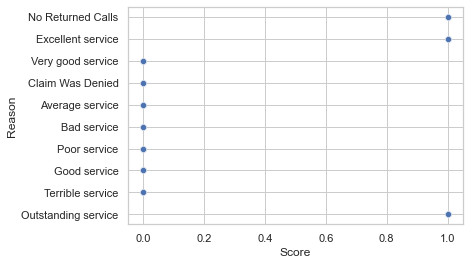

In [77]:
sns.scatterplot(x="Score", y="Reason", data=df_score)

<AxesSubplot:xlabel='Score', ylabel='Count'>

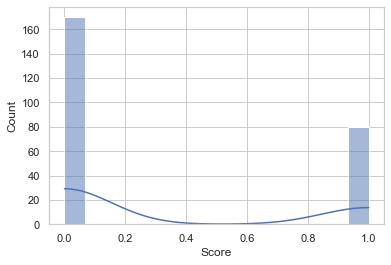

In [78]:
sns.histplot(df_score['Score'], kde=True, bins=15)

<AxesSubplot:xlabel='Gender', ylabel='Score'>

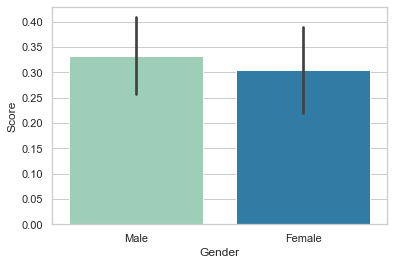

In [79]:
sns.barplot(x='Gender', y='Score', data=df_score, palette='YlGnBu')

In [80]:
columns_to_drop = ['Team_Member', 'Claim_Number','Customer','State']
df_test = df.drop(columns=columns_to_drop)
df_test

,Gender,Score,Reason
0,Male,1,No Returned Calls
1,Female,1,Excellent service
2,Female,0,Very good service
3,Female,0,Claim Was Denied
4,Female,0,Average service
...,...,...,...
245,Male,0,Claim Was Denied
246,Male,0,Terrible service
247,Male,0,Very good service
248,Female,0,Very good service


c:\Users\Chila\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


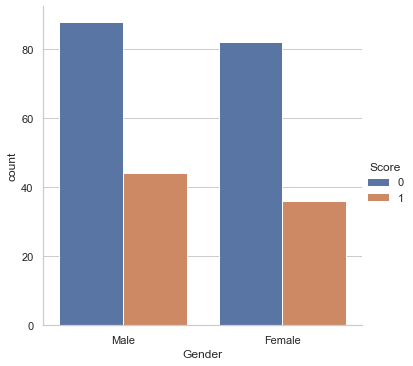

In [81]:
sns.catplot('Gender',data=df, kind='count',hue='Score')

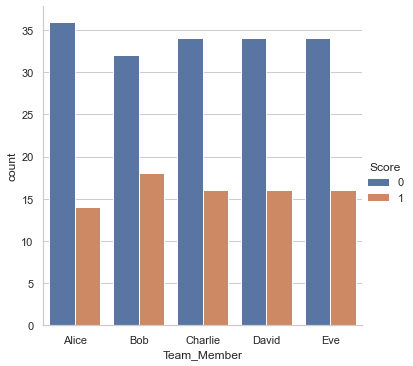

In [83]:
sns.catplot('Team_Member',data=df, kind='count',hue='Score')

c:\Users\Chila\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


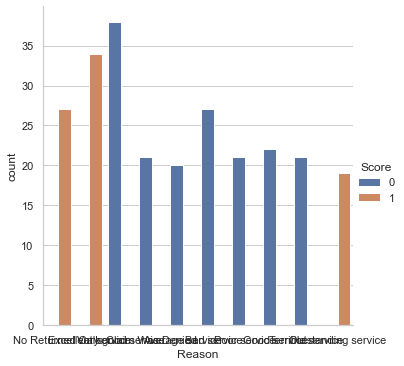

In [92]:
sns.catplot('Reason',data=df, kind='count',hue='Score')

c:\Users\Chila\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AttributeError: 'FacetGrid' object has no attribute 'show'

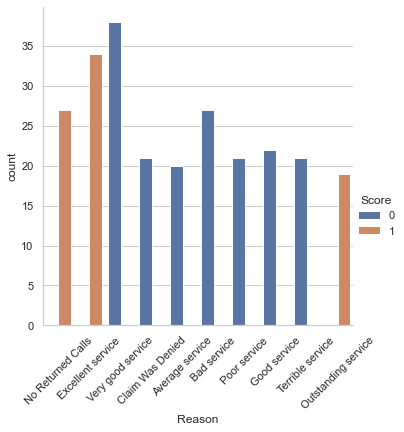

In [90]:
plot = sns.catplot('Reason',data=df, kind='count',hue='Score')
plot.set_xticklabels(rotation=45)
plot.show()